## Tutorial : Img2Img with LORA


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

/home/simo/anaconda3/envs/pytorch_latest/lib/python3.8/site-packages/torch/nn/modules/module.py:1402: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(


  0%|          | 0/37 [00:00<?, ?it/s]

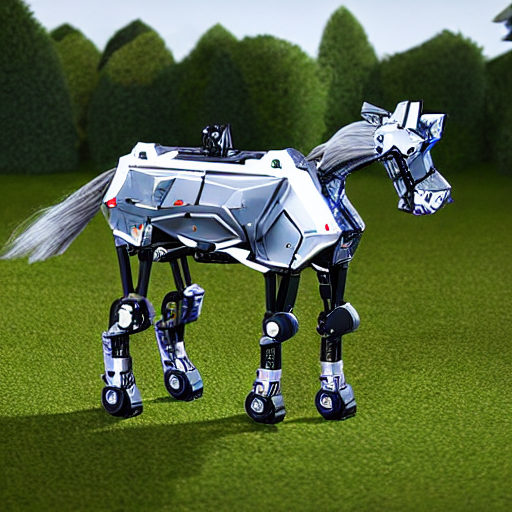

In [1]:
from diffusers import StableDiffusionImg2ImgPipeline
import torch
from PIL import Image


init_image = Image.open("../contents/horse.jpg").convert("RGB").resize((512, 512))

model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(
    "cuda"
)

prompt = "style of <s1><s2>, robotic horse with rocket launcher"
torch.manual_seed(1)
image = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5).images[0]

image


<s1>
The tokenizer already contains the token <s1>.
Replacing <s1> embedding.
<s2>
The tokenizer already contains the token <s2>.
Replacing <s2> embedding.


  0%|          | 0/37 [00:00<?, ?it/s]

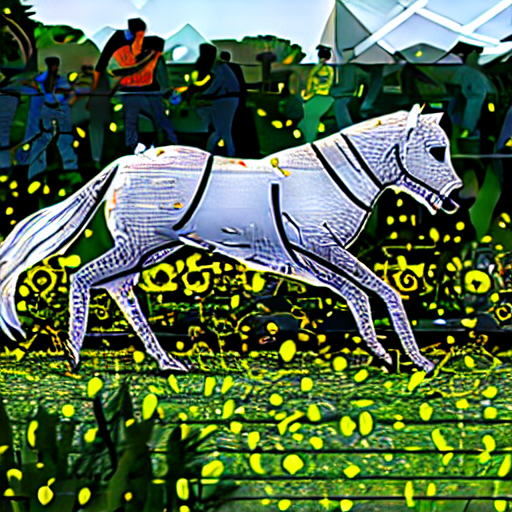

In [3]:
from lora_diffusion import patch_pipe, tune_lora_scale


patch_pipe(pipe, "../example_loras/lora_illust.safetensors", patch_text=True, patch_unet=True, patch_ti=True)

torch.manual_seed(1)
image = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5).images[0]

image


#


  0%|          | 0/37 [00:00<?, ?it/s]

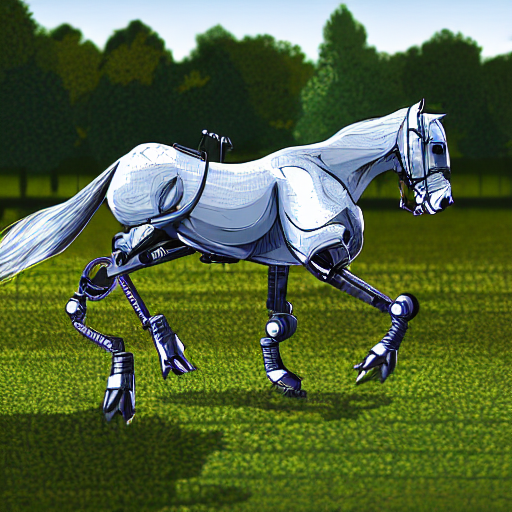

In [8]:
tune_lora_scale(pipe.unet, 0.0)
tune_lora_scale(pipe.text_encoder, 0.0)
# So just the latent inversion will have an effect :  
torch.manual_seed(1)
image = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5).images[0]

image

  0%|          | 0/37 [00:00<?, ?it/s]

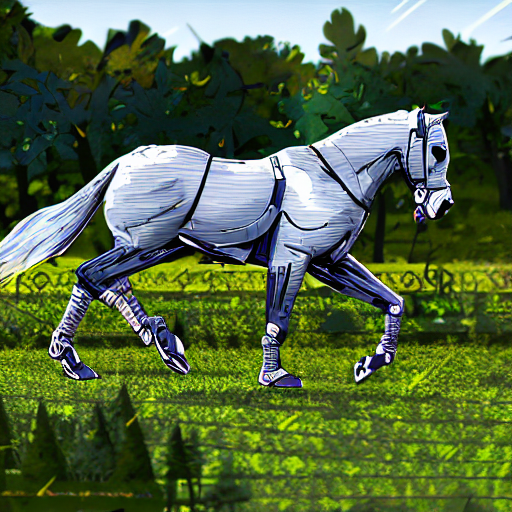

In [10]:
tune_lora_scale(pipe.unet, 0.7)
tune_lora_scale(pipe.text_encoder, 0.3)
# Something in the middle works ok
torch.manual_seed(1)
image = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5).images[0]

image